In [19]:
import pandas as pd
from scipy.stats import logistic

df = pd.read_csv("data/diabetes_prediction_dataset.csv")

In [20]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<Axes: xlabel='age', ylabel='blood_glucose_level'>

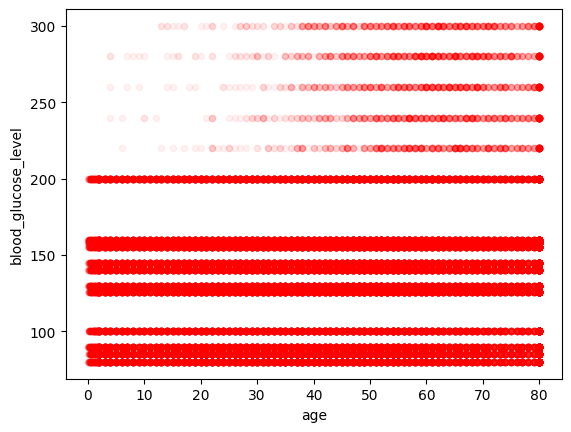

In [16]:
df.plot(kind="scatter", color="red", x="age", y="blood_glucose_level", alpha=0.05)

<Axes: xlabel='age', ylabel='diabetes'>

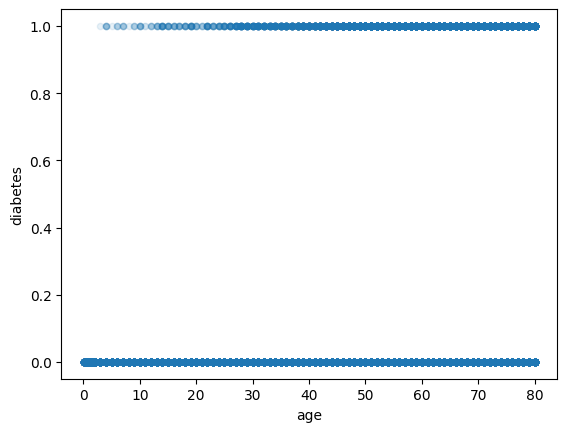

In [17]:
df.plot(kind="scatter", x="age", y="diabetes", alpha=0.1)


In [22]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

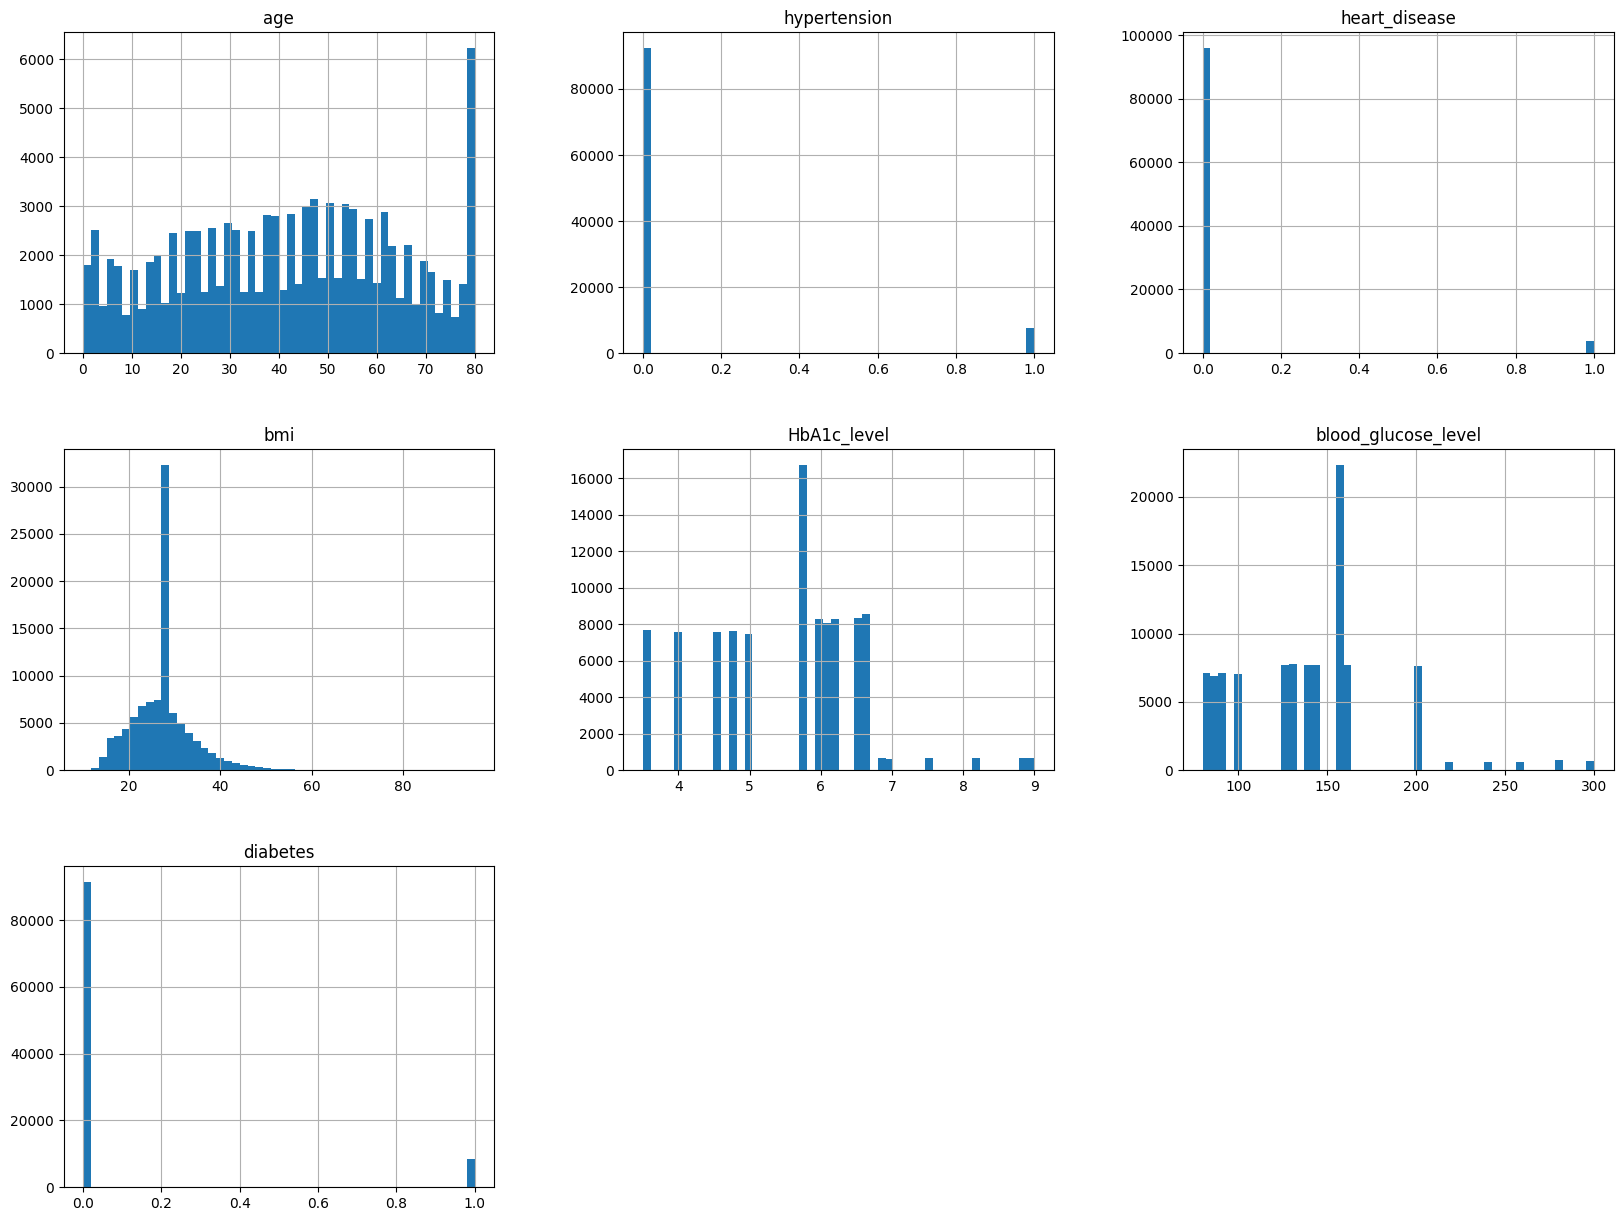

In [23]:
import matplotlib.pyplot as plt
df.hist(bins=50 , figsize= (20,15))
plt.show()

In [30]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [35]:
train_set, test_set = split_train_test(df, 0.2)

In [36]:
train_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75220,Male,73.0,0,0,former,24.77,3.5,80,0
48955,Male,80.0,0,0,never,24.60,5.7,145,1
44966,Female,38.0,0,0,ever,24.33,4.0,158,0
13568,Female,26.0,0,0,not current,18.87,5.0,100,0
92727,Female,61.0,1,0,current,22.11,4.5,85,0
...,...,...,...,...,...,...,...,...,...
6265,Male,49.0,0,0,never,32.98,5.7,80,0
54886,Female,15.0,0,0,never,28.10,5.0,159,0
76820,Male,42.0,0,0,never,26.14,5.8,85,0
860,Female,37.0,0,0,never,24.96,6.2,158,0


In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["age"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [38]:
strat_test_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
30903,Female,43.0,0,0,never,26.85,4.5,160,0
35626,Female,80.0,1,0,never,27.32,6.1,160,0
27431,Female,3.0,0,0,No Info,16.46,5.8,90,0
11037,Male,76.0,0,0,No Info,27.32,6.5,158,0
22506,Male,20.0,0,0,never,27.32,6.1,160,0
...,...,...,...,...,...,...,...,...,...
82765,Female,12.0,0,0,No Info,19.65,6.0,100,0
76544,Female,39.0,0,0,not current,23.86,6.5,220,1
85575,Female,34.0,0,0,never,19.00,6.0,145,0
82448,Male,50.0,0,0,current,27.32,5.7,130,0


In [39]:
pred = strat_train_set.copy()

In [41]:
pred = pred.drop(columns=['gender', 'smoking_history'])

In [42]:
pred

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
90843,57.0,0,0,27.32,6.5,158,0
82495,26.0,0,0,25.69,5.7,145,0
83879,41.0,0,0,27.32,6.2,155,0
43483,54.0,0,0,42.95,6.1,158,0
47866,37.0,0,0,27.90,6.0,159,0
...,...,...,...,...,...,...,...
88512,65.0,0,0,27.32,4.5,80,0
62295,39.0,0,0,22.35,6.2,200,0
52129,27.0,0,0,27.32,4.5,160,0
93713,56.0,0,0,29.50,6.8,280,1


In [43]:
corr_matrix = pred.corr()

In [51]:
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419143
HbA1c_level            0.399637
age                    0.257301
bmi                    0.216038
hypertension           0.195332
heart_disease          0.176650
Name: diabetes, dtype: float64

<Axes: xlabel='blood_glucose_level', ylabel='diabetes'>

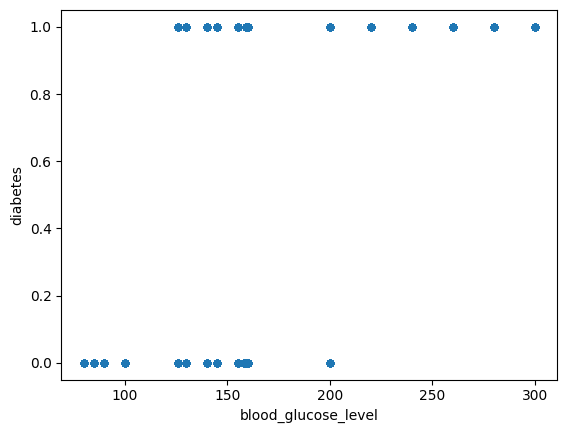

In [47]:
pred.plot(kind="scatter", x="blood_glucose_level", y="diabetes", alpha=0.1)

In [48]:
pred = strat_train_set.drop("diabetes", axis=1)
pred_labels = strat_train_set["diabetes"].copy()

In [54]:
df_smoking = strat_train_set["smoking_history"].copy()

In [55]:
df_smoking_encoded, df_smoking_cat = df_smoking.factorize()

In [60]:
df_smoking_encoded[:10]

array([0, 0, 1, 0, 0, 0, 2, 1, 3, 0], dtype=int64)

In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_sm_1hot = encoder.fit_transform(df_smoking_encoded.reshape(-1,1))
df_sm_1hot

<80000x6 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [62]:
encoder.categories_

[array([0, 1, 2, 3, 4, 5], dtype=int64)]

In [63]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

imputer.fit(df_sm_1hot)

SimpleImputer()

In [69]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(pred, pred_labels)

LinearRegression()

In [70]:
some_data = pred.iloc[:5]
some_labels = pred_labels[:5]

print("Prediction: ", lin_reg.predict(some_data))
print("True Values: ", list(some_labels))

Prediction:  [0.21848471 0.07398953 0.16521701 0.25010454 0.15509834]
True Values:  [0, 0, 0, 0, 0]


In [71]:
from sklearn.metrics import mean_squared_error

diabetes_predictions = lin_reg.predict(pred)
lin_mse = mean_squared_error(pred_labels, diabetes_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.22562522208890642

In [72]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(pred, pred_labels)

DecisionTreeRegressor()

In [74]:
diabetes_predictions = tree_reg.predict(pred)
tree_mse = mean_squared_error(pred_labels, diabetes_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.04321665053675937

In [100]:
test_labels = test_set["diabetes"].copy()
test_prepared = test_set.drop(["diabetes", "gender", "smoking_history"], axis=1)
test_set_pred = tree_reg.predict(test_prepared)

In [101]:
print("Prediction: ", test_set_pred[:30])
print("True Values: ", list(test_labels)[:30])

Prediction:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0.]
True Values:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [87]:
def mse(x, y):
    meanse = mean_squared_error(y, x)
    rmse = np.sqrt(meanse)
    print("RMSE: ", rmse)

In [92]:
mse(test_labels, test_set_pred)

RMSE:  0.22644890981999782


In [95]:
from sklearn.linear_model import LogisticRegression

#trying to train with LogisticRegression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(pred, pred_labels)

LogisticRegression(max_iter=1000)

In [96]:
test_labels = test_set["diabetes"].copy()
test_prepared = test_set.drop(["diabetes", "gender", "smoking_history"], axis=1)
test_set_pred = logistic_reg.predict(test_prepared)

In [102]:
print("Prediction: ", test_set_pred[:50])
print("True Values: ", list(test_labels)[:50])

Prediction:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]
True Values:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [98]:
mse(test_labels, test_set_pred)

RMSE:  0.20334699407662754
